# Assignment Sheet 3

# Assignment 3.1

In this task we generate two dimensional data with two classes (meaning that there are a total of three columns in your data set, features x1, x2 and label) synthetically. Use a tool-kit of your choice.


a) Select 100 samples (per class) from a normal distribution. For the first class, consider the mean as (0,0) and covariance matrix as [(1,0),(0,1)]. For the second class, consider the mean as (5,0) and same covariance matrix. Visualise all 200 instances in a single plot with different colors for each class.

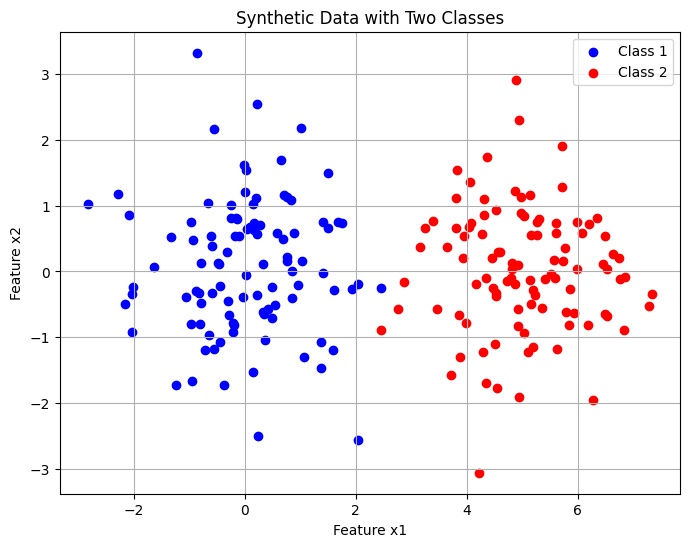

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.inspection import DecisionBoundaryDisplay

# a)
rng = np.random.default_rng(seed=3)
class1_data = rng.multivariate_normal(mean=(0, 0), cov=[[1, 0], [0, 1]], size=100)
class2_data = rng.multivariate_normal(mean=(5, 0), cov=[[1, 0], [0, 1]], size=100)

plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.title('Synthetic Data with Two Classes')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.grid(True)
plt.show()

b) Play with the data by trying out different mean values which are close between the classes. Create data set two by keeping all parameters same as above, just change the second mean to (2.25,0). Visualize it!

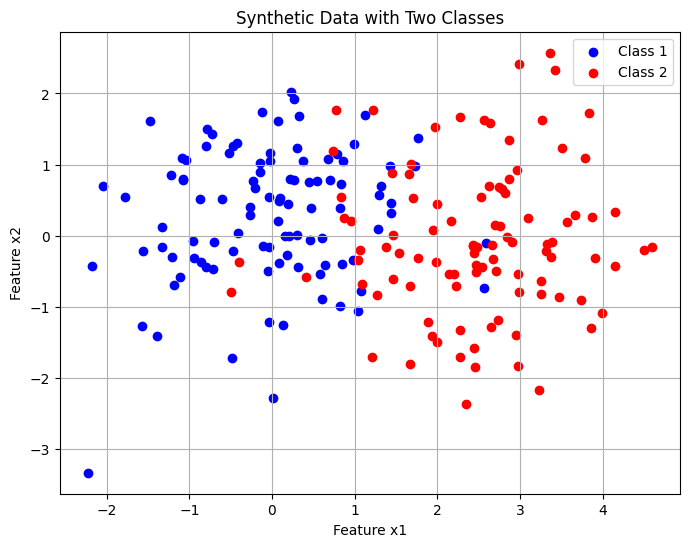

In [5]:
# b)
class1_data2 = rng.multivariate_normal(mean=(0, 0), cov=[[1, 0], [0, 1]], size=100)
class2_data2 = rng.multivariate_normal(mean=(2.5, 0), cov=[[1, 0], [0, 1]], size=100)

plt.figure(figsize=(8, 6))
plt.scatter(class1_data2[:, 0], class1_data2[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data2[:, 0], class2_data2[:, 1], color='red', label='Class 2')
plt.title('Synthetic Data with Two Classes')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.grid(True)
plt.show()

c) Combine the data sampled in the first step (both of the classes) and create a single data set of 200 instances. Randomize the data. Fit a logistic regression model on two thirds of data (randomly sampled). Report the model performance on the remaining one-third (test set). Now perform the same task but with stratified sampling, plot the data with the decision boundary.

Fitting logistic regression on 2/3 of the data with random sampling results in test accuracy of 98.5 %. If we use stratified sampling, I obtain an accuracy of 1. If we sample randomly, there is no guarantee that we get the same number of samples from class 1 and class 2, but it is guaranteed if we use stratified sampling, which can consequently increase our classification accuracy.

The classification accuracy of the classifier with random sampling was 0.985
The classification accuracy of the classifier with stratified sampling was 1.0




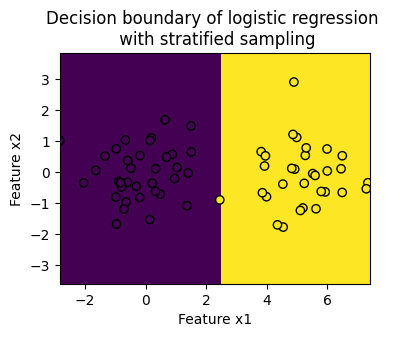

In [34]:
# c)

# Add class labels
class_label1 = np.array([1]*100); class_label2 = np.array([2]*100)
class_labels = np.hstack((class_label1, class_label2))

# Combine the data, vertically stacking the arrays
arr1 = np.array(class1_data); arr2 = np.array(class2_data)
arr3 = np.vstack((arr1, arr2))

# Draw samples randomly and fit a logistic regression, 1/3 will be test size
X_train, X_test, y_train, y_test = train_test_split(arr3, class_labels, test_size=0.33, random_state=42)

# Create an instance of the classifier 
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(f"The classification accuracy of the classifier with random sampling was {clf.score(X_test, y_test):.3f}")

# Stratified sampling
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)
for train_index, test_index in sss.split(arr3, class_labels):
    X_train_s, X_test_s = arr3[train_index], arr3[test_index]
    y_train_s, y_test_s = class_labels[train_index], class_labels[test_index]

clf_s = LogisticRegression(random_state=0).fit(X_train_s, y_train_s)

print(f"The classification accuracy of the classifier with stratified sampling was {clf_s.score(X_test_s, y_test_s):.1f}")

clf_s.fit(X_train_s, y_train_s)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    clf_s,
    X_train,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    eps=0.5,
)

# Separate the output a bit 
print("\n")

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k")
plt.title("Decision boundary of logistic regression \n with stratified sampling")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.show()

d) Consider the previous step, what is the hypothesis space for the logistic regression model? Provides plots, examples to justify your answer shortly.

The hypothesis space of the logistic regression model is the set of all functions with the form 

$$
f(\textbf{x}, \textbf{w}) = \frac{1}{1+exp(-\textbf{w}^T\textbf{x})}
$$

in the 2D example of our 2 features, the hypothesis space represents the set of all decision boundaries in that space, fully subsuming that space. 

e) What is the true target function in the third step? Is it possible to precisely locate it? Justify shorty!

The true target function CANNOT be precisely located. This is because there is a degree of randomness to the drawing of samples from normal distributions which, albeit their standard deviation are quite small, can produce ANY NUMBER as their output, just with exceedingly small probabilities which tend to zero.

f) (Optional. Only for Python Users!) Use the data set two created in the second step. Randomize the instances. Learn a decision tree on two-thirds of the data and report model performance (evaluation) on the remaining one third. Use this library to decompose your error into bias and variance. What happens if you use bagging? Explain your answer in 1-2 sentences!

## Assignment 3.2

In this task we perform model selection and evaluation on Iris data set in a classification setting. Feel free to use any ML tool-kits like Python sklearn but it is recommended NOT to use the sklearn cross validation or model selection utility, else you will not understand the concepts! Try the following:

a) Partition the data into three parts randomly - 50\% as training, 25\% as validation and 25\% for test.

I performed this split using ONLY THE FIRST TWO FEATURES (otherwise the problem is too easy for my kNN).

b) Select k-nearest neighbour algorithm for the classification task. Create different models with three choices of k (one, three, five). Assuming that this data is sufficient, perform model selection to select an optimal value of k. Explain your choice with relevant plots.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

iris = datasets.load_iris()

# a) - Importantly, I am ONLY using the first 2 features to make this a little harder for the modle
X_train, X_2, y_train, y_2 = train_test_split(iris.data[:, :2], iris.target, test_size=0.5, random_state=42)
X_val = X_2[0:38, :]
X_test = X_2[38::, :]

y_val = y_2[0:38]
y_test = y_2[38::]

# b)
k_list = [1, 3, 5]
val_accuracy_list = []

for k in k_list:
    # Learn a kNN model with different k-values
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_accuracy_list.append(knn.score(X_val, y_val))

# Plotting validation accuracies vs. k values
plt.bar(k_list, val_accuracy_list)
plt.title('Classification accuracy (validation set) over different k-values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_list)
plt.show()

# Selecting the best k based on validation accuracy
best_k = k_list[np.argmax(val_accuracy_list)]
print("Best k value:", best_k)


def plot_decision_boundary(X, y, classifier, title):
    h = 0.02  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')


plt.figure(figsize=(15, 5))

for i, k in enumerate(k_list, 1):
    # Train a kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train[:, :2], y_train)  # Considering only the first two features for visualization

    # Plot decision boundary
    plt.subplot(1, 3, i)
    plot_decision_boundary(X_val[:, :2], y_val, knn_classifier, f'Decision boundary for kNN (k={k})')

plt.tight_layout()
plt.show()

c) (Optional) If you are using python-sklearn, use the grid search utility and select an optimal value of k.

Using this scikit-learn method in the range [1, 3, 5, 7, 9, 11], the best k identified was 9.

In [ ]:
# c)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11]}

# Initialize kNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print("Best k value:", best_k)
print("Best cross-validation score:", best_score)

d) Once the winner model is selected, estimate generalization error on the independent test set. Visualize confusion matrices.

In [ ]:
# d)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=knn_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn_classifier.classes_)
disp.plot()
plt.show()

print(knn_classifier.score(X_test, y_test))


e) Perform model selection and evaluation using 5-fold cross validation (still keeping a separate test set and without feature selection!). What is your selected model? Report your 5-fold cross validation average error and estimated generalization error on the test set. Do you observe any differences between the former hold-out method and 5-fold cross validation?

The cross-validation approach also selected k of 5 as the optimal value of k. The average accuracy for this value was 0.75 and the generalised error on the test set (20\% of the original dataset). 

In [ ]:
# e) Using 5-fold cross-validation
# Split the data into training and test sets
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(iris.data[:, :2], iris.target, test_size=0.2,
                                                                random_state=42)

# Define the range of k values for model selection
k_values = [1, 3, 5]

# Perform model selection using 5-fold cross-validation
best_score = 0
best_k = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    avg_score = scores.mean()

    if avg_score > best_score:
        best_score = avg_score
        best_k = k

# Fit the best model on the entire training set
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)

print("Selected model: kNN with k =", best_k)
print("5-fold Cross Validation Average Accuracy:", best_score)
print("Estimated Generalization Error on Test Set:", 1 - test_score)

(Optional) Perform model selection and evaluation with 5-fold cross validation, but now consider feature selection (using mutual information or correlation with class) with two options. Option one, select a set of features internally, inside each of the K-1 folds, but leaving out instances from the validation fold. Option two, select features globally (unfairly, on the whole data set!) and then build classifiers using these features in each of the folds. Do you find any difference in the error values between option one and two? Report them. You can try this optional step on Twenty News groups since Iris has a relatively small feature space!

Not completed yet


## Assignment 3.3

In this task we compare two classifiers (Logistic regression and Naive Bayes) using learning curves. Consider the UCI breast cancer data set and a tool kit of your choice:

a) Report the hyperparameters used for both of the classifiers. Select a random or default value as per the tool-kit, but keep it same throughout the task.

The hyperparameters of logistic regression include the regularisation, set to L2 or ridge regression, the solver (the algorithm used), set to limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm. Furthermore, class weight is 1 for all classes. Lastly, the inverse of the regularisation strength (C) is set to 1.

I chose to implement the Gaussian Naive Bayes which assumes the likelihoods of the features come from normal distributions. There are no more hyperparameters to speak of, except for the var\_smoothing which is used to prevent numerical instability. 

b) Plot learning curves with error rate on the vertical axis and portions of training data on the horizontal. Generate five points on the curve, using [0.2, 0.4, 0.6, 0.8, 1 ] fractions of your training set and testing on the full test set each time. Average your results over 5 random splits of the data into a training and test set (always keep 2/3 of the data for training and 1/3 for testing, it is recommended to use stratified sampling, if your tool-kit supports). Plot the result of both classifiers on the same curve. Compare your results and with this publication.

In [ ]:
# !pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.preprocessing import StandardScaler

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features.to_numpy()
y = breast_cancer_wisconsin_diagnostic.data.targets

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Start with LR first
LR_score_final = []
# Iterate over a portion of the data, 0.2, 0.4, 0.6, 0.8, 1
for portion in range(1, 6):

    LR_score = []

    # Iterate 5 times
    for _ in range(500):
        # Split your data into 2/3 training and 1/3 testing
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, stratify=y)
        # print(y_train)
        X_train = X_train[0:int(np.floor(len(X_train)/5)*portion), :]
        y_train = y_train[0:int(np.floor(len(y_train)/5)*portion)]
        # Train the classifier on a portion of the data, obtain teh accuracy of prediction
        logistic_regression = LogisticRegression(max_iter=250)
        logistic_regression.fit(X_train, y_train.values.ravel())
        LR_score.append(1-logistic_regression.score(X_test, y_test.values.ravel()))
    LR_score_final.append(np.mean(LR_score))

# Now do this for the NB
NB_score_final = []
for portion in range(1, 6):

    NB_score = []

    # Iterate 5 times
    for _ in range(500):
        # Split your data into 2/3 training and 1/3 testing
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, stratify=y)
        X_train = X_train[0:int(np.floor(len(X_train)/5)*portion), :]
        y_train = y_train[0:int(np.floor(len(y_train)/5)*portion)]

        # Train the classifier on a portion of the data, obtain teh accuracy of prediction
        gaussian_nb = GaussianNB()
        gaussian_nb.fit(X_train, y_train.values.ravel())
        NB_score.append(1-gaussian_nb.score(X_test, y_test.values.ravel()))
    NB_score_final.append(np.mean(NB_score))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax[0].plot([0.2, 0.4, 0.6, 0.8, 1], LR_score_final)
ax[1].plot([0.2, 0.4, 0.6, 0.8, 1], NB_score_final)
ax[0].set_title("Logistic Regression")
ax[1].set_title("Naive Bayes")
ax[0].set_ylabel("Classification error")
ax[0].set_xlabel("Proportion of training set")
ax[1].set_xlabel("Proportion of training set")
plt.show()


c) What inferences do you draw from the learning curve? Explain shortly in 2-3 sentences.

I expected the generalisation error to decrease as the size of the training set increases. I could not find this reliably with averaging over 5 iterations and instead implemented 500. Still, the NB classifier strangely went up in error when the training set was the largest - this may be due to overfitting the data?

## Assignment 3.4

In this task we compare the performance of two classifiers (Logistic regression andDecision Trees) using Dietterich’s 5x2cv paired t-test. Use any tool-kit of yourchoice or this script 5 and perform the following:

a) Learn both classifiers on Twenty News groups data set (assume a standardpreprocessing with count vectorizer features) with two thirds for training andone third for testing. Try just one run and report your error or prediction rates.

For logistic regression, the accuracy was 0.95436 and for the decision tree0.7986.

b) Mention the null hypothesis and the alternate hypothesis. Assume asignificance threshold and report it.

The null hypothesis technically is that the difference of the performancesbetween the two classifiers is 0. In other words, their classification accuracy is thesame. The significance threshold is canonically set to 0.05.

c) Run the statistical test and report the value of the test statistic and thecorresponding p-value.

The t-statistic was 7.747 and the corresponding p-value was 0.001.

d) Draw your conclusion in one sentence!

This p-value is smaller than than the threshold and therefore we can rejectthe null hypothesis. Therefore, we can conclude logistic regression is the superiorclassifier to a decision tree in this case. However, we should also consider theeffect size - that is, by how much is the former surpassing the latter in terms ofclassification accuracy.